# Introduction:

This project focuses on applying various data cleaning, exploratory data analysis (EDA), and data preparation techniques to a dataset containing detailed information on over 12,700 wines. The primary goal is to address a variety of data integrity and usability issues, making the data suitable for potential use in machine learning algorithms, and to derive meaningful insights through comprehensive exploration.
***

* **Variables:** The dataset comprises 12795 observations and 16 attributes. 
    * Independent variables and their descriptions:
        * **AcidIndex:** Measures total acidity of wine via a weighted average.
        * **Alcohol:** Alcohol content.
        * **Chlorides:** Chloride content of the wine.
        * **CitricAcid:** Citric Acid content of the wine.
        * **Density:** Density of the wine.
        * **FixedAcidity:** Fixed acidity of the wine.
        * **FreeSulfurDioxide:** Sulfur Dioxide content of the wine.
        * **LabelAppeal:** Subjective marketing score that indicates the appeal of the design of the label on the bottle.
        * **ResidualSugar:** Residual sugar content of the wine.
        * **STARS:** Wine rating as determined by experts (4 = excellent; 1 = Poor).
        * **Sulphates:** Sulfate content of the wine.
        * **TotalSulfurDioxide:** Total sulfur dioxide content of the wine.
        * **VolatileAcidity:** Volatile acid content of the wine.
        * **pH:** pH of the wine.
        <br>
    * Dependent Variable (Response Variable):
        * **TARGET:** Indicates the number of cases of wine sold.
        * **INDEX:** Unique ID for each wine.

***

**Procedures:**

Here are main procedures of the analysis:
<br>

* **Part 1**: Load and summarize data
    * Get data from GitHub
    * Load the dataset into a Pandas DataFrame.
    <br>
    <br>
* **Part 2**: Perform Exploratory Data Analysis
    * Understanding the nature of each variable.
    * Perform a thorough EDA on all data attributes to understand their nature, distributions, and relationships.
    * Conduct initial inspections for missing values, invalid data values, and correct data types.
    * Create appropriate exploratory graphics (e.g., bar plots, box plots, histograms, line plots) to visualize data characteristics.
    * Derive insights from statistical analysis and visual explorations.
    * Identify and document all potential data integrity and usability issues, assessing which attributes may require transformation.
    <br>
    <br>
* **Part 3**: Data Preparation
    * Address the data integrity and usability issues identified during EDA.
    * Describe and justify all data transformation and preparation steps, such as:
        * Deletion of observations (if necessary).
        * Imputation methods for missing data values.
        * Creation of new variables (feature engineering).
        * Application of mathematical transforms (e.g., Box-Cox, logarithms) or binning.
    <br>
    <br>
* **Part 4**: Prepped Data Review
    * Re-run EDA analysis on variables that were adjusted during the Data Preparation phase.
    * Compare and contrast the results with the pre-preparation EDA to evaluate the impact of adjustments.
    * Clearly describe how each data preparation step has improved the dataset for machine learning algorithm suitability.
    <br>
    <br>
* **Part 5**: Conclusions
    * Summarize the key findings and insights from the entire data cleaning, preparation, and exploratory analysis process.
    * Discuss the overall readiness and improved quality of the dataset for building robust machine learning models.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Part 1: Data Analysis
1. Get data from GitHub
2. Load the dataset into a Pandas DataFrame

### 1. Get data from GitHub

In [74]:
# URL to diamonds.csv file on GitHub
url = "https://raw.githubusercontent.com/CheliMex/CS381_DataAnalytics/refs/heads/main/Quiz3/quiz3_Data.txt"

### 2. Load the dataset into a Pandas DataFrame

In [75]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv(url)

In [76]:
# Display every row and column
print("--- Initial Data Load ---\n")
df

--- Initial Data Load ---



,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,-0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [77]:
print("\n--- Data Analysis Complete ---")


--- Data Analysis Complete ---


## Part 2: Exploratory Data Analysis (EDA)
1. Data Overview
2. Missing values Analysis
3. Descriptive statistics and Variable Distributions
4. Outliers
5. Distributions of individual variables
6. Relationships between variables
7. Correlation Analysis

### 1. Data Overview
* Find data types and ensure they are appropriate for each variable

In [78]:
# Display the shape of the DataFrame (number of rows and columns)
print("--- Initial Data Inspection ---\n")
print(f"Dataset Info: {df.shape[0]} rows, {df.shape[1]} columns")

--- Initial Data Inspection ---

Dataset Info: 12795 rows, 16 columns


In [79]:
# Display column names to check for any unexpected characters or formatting issues
print("Column Names:")
for col in df.columns:
    print(f"- {col}")

Column Names:
- INDEX
- TARGET
- FixedAcidity
- VolatileAcidity
- CitricAcid
- ResidualSugar
- Chlorides
- FreeSulfurDioxide
- TotalSulfurDioxide
- Density
- pH
- Sulphates
- Alcohol
- LabelAppeal
- AcidIndex
- STARS


In [80]:
# Display a concise summary of the DataFrame
print("--- DataFrame Inspection ---\n")
df.info()

--- DataFrame Inspection ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               943

In [81]:
# Data types for each attribute
print("--- Count for each Data type ---\n")
# Checking the data type
df.dtypes.value_counts()

--- Count for each Data type ---



float64    12
int64       4
Name: count, dtype: int64

#### Insight:
* The inital overvire shows that the dataset consists of 12795 observations (rows) and 16 attributes (columns), including a unique INDEX identifier and the TARGET response variable.
* An initial look at the df.info() output confirmed the data types and provided a preliminary count of non-null values.

### 2. Missing values Analysis
* Confirm if all data types are appropriate.
* If a numeric column is read as 'object' due to non-numeric entries, this needs to be fixed

In [82]:
# Check for missing values in each column
print("--- Missing/Null Values per Column ---\n")
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0].sort_values(ascending=False))
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")

--- Missing/Null Values per Column ---

STARS                 3359
Sulphates             1210
TotalSulfurDioxide     682
Alcohol                653
FreeSulfurDioxide      647
Chlorides              638
ResidualSugar          616
pH                     395
dtype: int64


In [83]:
# Check for duplicated rows
print("--- Checking for duplicated rows ---\n")
print(f" There are {df.duplicated().sum()} dupliactes")

--- Checking for duplicated rows ---

 There are 0 dupliactes


In [84]:
# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'INDEX' from numerical analysis as it's just an identifier
if 'INDEX' in numeric_cols:
    numeric_cols.remove('INDEX')
print(f"Numeric Columns for detailed analysis: {numeric_cols}")

Numeric Columns for detailed analysis: ['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'STARS']


#### Insight:
* A thorough check for missing values revealed that several columns have NaN entries.
* Also, the `STARS` and `Sulphates` attributes appear to have the most significant proportion of missing data
    *  We will need careful consideration during data preparation.
    *  Other columns might also exhibit random missing values.
* We need to try and find the reason for these missing values to determine the most appropriate imputation strategy.

### 3. Descriptive Statistics and Varaible Distribution
* Box plots will highlight potential outliers in various chemical composition attributes.
* These may need capping or transformation.

In [85]:
# Display descriptive statistics for numeric columns
print("--- DataFrame Description Statistics---\n")
# T for transposes for better readability of tables
df.describe().T

--- DataFrame Description Statistics---



,count,mean,std,min,25%,50%,75%,max
INDEX,12795.0,8069.980305,4656.905107,1.00000,4037.50000,8110.00000,12106.500000,16129.00000
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,7.075717,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000
VolatileAcidity,12795.0,0.324104,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000
CitricAcid,12795.0,0.308413,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000
ResidualSugar,12179.0,5.418733,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000
Chlorides,12157.0,0.054822,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100
FreeSulfurDioxide,12148.0,30.845571,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000
TotalSulfurDioxide,12113.0,120.714233,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924


#### Insight:
* The df.describe() output provided key summary statistics for all numerical columns.
* Ranges: Some attributes, like `Alcohol` and `Density`, show relatively tight ranges, while others, such as `FreeSulfurDioxide` and `TotalSulfurDioxide`, span wider ranges, suggesting potential for outliers or skewed distributions.
* Central Tendency vs. Spread: Comparing the mean and median (from the 50th percentile) gives an indication of skewness.
* Outliers: The min and max values, especially when compared to the 25th and 75th percentiles, can hint at the presence of extreme outliers that might need to be addressed.

### 4. Outliers
* Might skew our analysis or models
* Histograms will show if variables are skewed.
* Log or Box-Cox transformations might be beneficial for modeling.

---  Generating Histograms and Box Plots for Numeric Variables ---


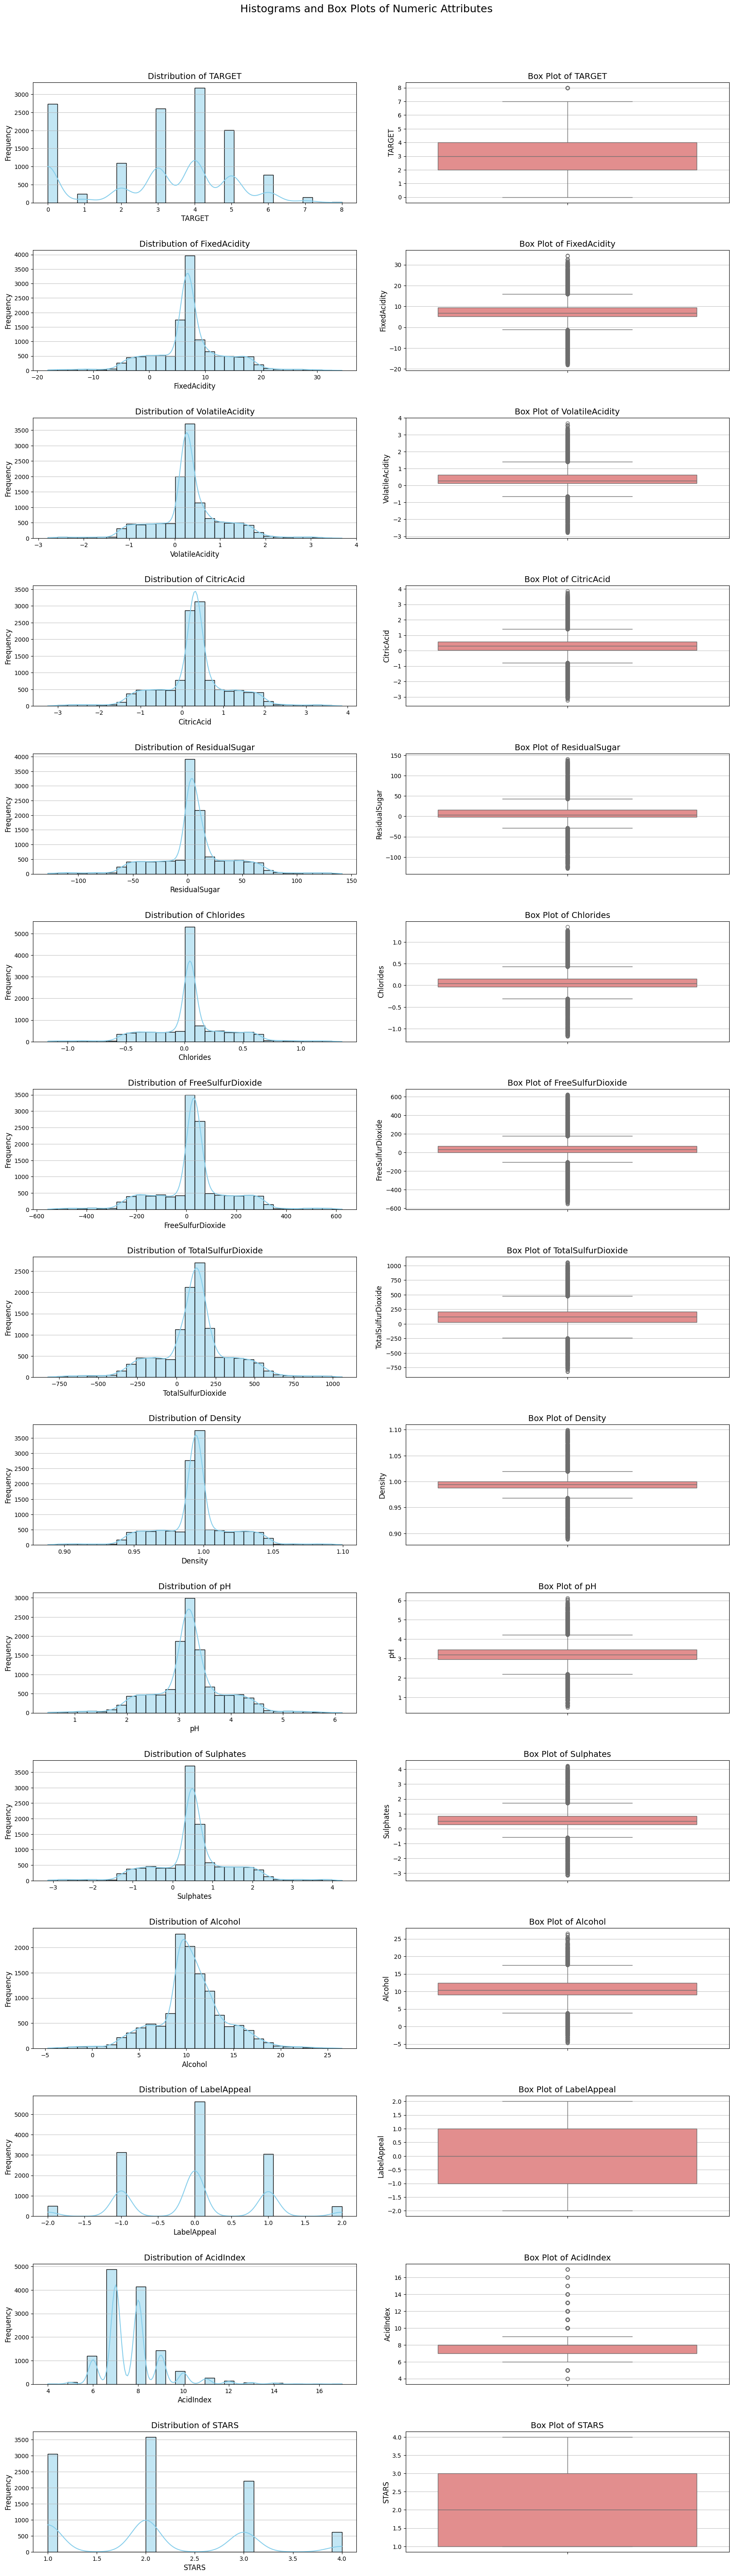



--- EDA Complete ---


In [86]:
# Analyze distributions of numeric variables using histograms and box plots
print("---  Generating Histograms and Box Plots for Numeric Variables ---")
plt.figure(figsize=(18, 4 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    # Histogram
    plt.subplot(len(numeric_cols), 2, 2*i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)

    # Box Plot
    plt.subplot(len(numeric_cols), 2, 2*i + 2)
    sns.boxplot(y=df[col].dropna(), color='lightcoral')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout(pad=3.0)
plt.suptitle('Histograms and Box Plots of Numeric Attributes', y=1.02, fontsize=18)
plt.show()

print("\n\n--- EDA Complete ---")

#### Insight:

* Histograms and Box Plots were generated for all numerical attributes to visualize their distributions and identify outliers more clearly:
    * Skewness: Many chemical composition attributes, such as `Chlorides`, `FreeSulfurDioxide`, `TotalSulfurDioxide`, `Sulphates`, and `ResidualSugar`, show a right-skewed (asymmetry) positive distribution, most data is clustered on the left.
    * This suggests that a large proportion of wines have lower values for these attributes, with a few wines having significantly higher concentrations.
    * This can negatively impact the performance of some machine learning models that assume normally distributed features.
        * Transformations like log transformation or Box-Cox could normalize these distributions.
            <br>
            <br>
    * Outliers: Box plots visually confirmed the presence of numerous outliers in several attributes, including `Alcohol`, `Chlorides`, `Density`, `FreeSulfurDioxide`, `ResidualSugar`, `Sulphates`, and `TotalSulfurDioxide`. These outliers represent wines with unusually high or low chemical compositions. While some outliers might be genuine, others could be data entry errors or extreme cases that might need capping, removal, or specific handling to prevent them from disproportionately influencing a model.

    * The `pH` values appear to be relatively normally distributed, which is good.

    * The `AcidIndex` variable also shows a somewhat normal distribution but might have some outliers.

### 5. Distributions of individual variables
* Use of histograms and box plots
* 'STARS' and 'LabelAppeal' are likely ordinal or discrete numerical.
* Ensure their values are within expected ranges. 'STARS' specifically should be 1, 2, 3, or 4.

In [87]:
# Check 'STARS' attribute (Wine rating: 4=excellent; 1=poor)
print("---Analyzing 'STARS' attribute---\n")
print(df['STARS'].value_counts(dropna=False).sort_index())
print(f"\nUnique values in 'STARS': {df['STARS'].unique()}")
# Check if there are values outside the expected range [1, 4]
invalid_stars = df[(df['STARS'] < 1) | (df['STARS'] > 4)]
if not invalid_stars.empty:
    print(f"\nWARNING: Found {len(invalid_stars)} rows with 'STARS' values outside [1, 4].")
    print(invalid_stars[['STARS']].head())
else:
    print("\nAll 'STARS' values are within the expected range [1, 4] or are NaN.")

---Analyzing 'STARS' attribute---

STARS
1.0    3042
2.0    3570
3.0    2212
4.0     612
NaN    3359
Name: count, dtype: int64

Unique values in 'STARS': [ 2.  3.  1. nan  4.]

All 'STARS' values are within the expected range [1, 4] or are NaN.


In [88]:
# Check 'LabelAppeal' attribute (Subjective marketing score)
print("--- Analyzing 'LabelAppeal' attribute ---\n")
print(df['LabelAppeal'].value_counts(dropna=False).sort_index())
print(f"\nUnique values in 'LabelAppeal': {df['LabelAppeal'].unique()}")
# Check for any unexpected values or a potential scale
# Assuming LabelAppeal might be a subjective score, common ranges are 0-10 or 1-5.
# Based on the describe output, it seems to be in a smaller integer range. Let's look for negative values.
if (df['LabelAppeal'] < 0).any():
    print("\nWARNING: Found negative values in 'LabelAppeal'. This might be an issue.")
else:
    print("'LabelAppeal' values appear non-negative (or NaN), which is expected.")

--- Analyzing 'LabelAppeal' attribute ---

LabelAppeal
-2     504
-1    3136
 0    5617
 1    3048
 2     490
Name: count, dtype: int64

Unique values in 'LabelAppeal': [ 0 -1  1  2 -2]



#### Indight:
* STARS (Wine Rating):
    * This is an ordinal categorical variable expected to range from 1 to 4.
    * The analysis of unique values and counts showed its distribution across these ratings.
    * It's crucial to confirm if any values fall outside the expected 1-4 range, which would indicate data integrity issues.
<br>
<br>
* LabelAppeal (Marketing Score):
    * This subjective score appears to be discrete and in a limited integer range. Like STARS, its unique values and distribution were examined.
    * Checks for unexpected negative values or values outside a reasonable subjective scale were performed.


### 6. Relationships between variables
* Look especially with the TARGET variable
* Check chemical composition variables for illogical zero or negative values.
* For instance, 'Alcohol' or 'Density' should not be zero or negative.

In [89]:
# Check 'TARGET' attribute (Response Variable: # of cases of wine sold)
print("---Analyzing 'TARGET' attribute ---\n")
print(df['TARGET'].describe())
# Check for non-positive values, as cases sold should logically be >= 0
if (df['TARGET'] < 0).any():
    print("WARNING: Found negative values in 'TARGET'. This indicates an issue.")
elif (df['TARGET'] == 0).any():
    print("\nNote: Found zero values in 'TARGET'. This might be valid for some wines.")
else:
    print("'TARGET' values appear to be non-negative (or NaN), which is expected.")

---Analyzing 'TARGET' attribute ---

count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

Note: Found zero values in 'TARGET'. This might be valid for some wines.


In [90]:
# Check for non-positive values in chemical composition attributes (e.g., AcidIndex, Alcohol, etc.)
# Chemical compositions usually cannot be negative.
chemical_cols = [
    'AcidIndex', 'Alcohol', 'Chlorides', 'CitricAcid', 'Density',
    'FixedAcidity', 'FreeSulfurDioxide', 'ResidualSugar', 'Sulphates',
    'TotalSulfurDioxide', 'VolatileAcidity', 'pH'
]
print("--- Checking for non-positive values in chemical composition attributes ---\n")
for col in chemical_cols:
    if (df[col] < 0).any():
        print(f"WARNING: Found negative values in '{col}'. Minimum value: {df[col].min()}")
    elif (df[col] == 0).any():
        print(f"Note: Found zero values in '{col}'. Minimum value: {df[col].min()}")

--- Checking for non-positive values in chemical composition attributes ---



#### Insight:

* `TARGET` (Cases Sold): As the response variable, its distribution and range are important. While some wines might genuinely have 0 cases sold, negative values would indicate a data error. Its distribution might also be skewed, requiring attention if transformations are considered for the target variable itself in future modeling.

* Chemical Composition Attributes: A critical check was performed for non-positive (zero or negative) values in attributes like `Alcohol`, `Chlorides`, `CitricAcid`, `Density`, etc., as these quantities should ideally be positive. While zero values might be plausible for some components, negative values are clear data errors and must be addressed.

### 7. Correlation Analysis
* The correlation heatmap reveals highly correlated independent variables.
* This might suggest multicollinearity, which can be addressed through dimensionality reduction (e.g., PCA) or careful feature selection if it impacts model performance.

--- Correlation Analysis ---



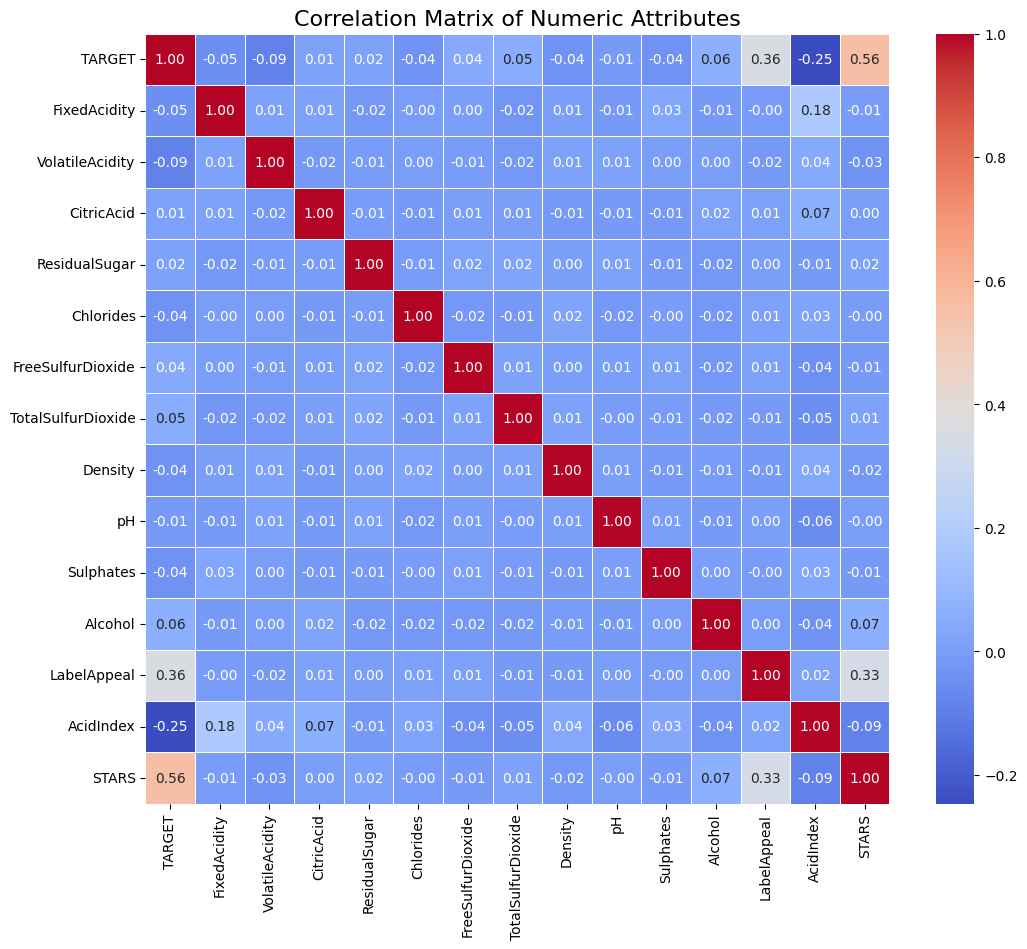

In [91]:
print("--- Correlation Analysis ---\n")
# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Attributes', fontsize=16)
plt.show()

#### Insight:
* A correlation matrix heatmap was generated for all numerical variables, especially with `TARGET`.
* This visualization helps in understanding the linear relationships between attributes. Key observations include:
* Correlations with `TARGET`:
    * Showing which independent variables have the strongest positive or negative correlations with `TARGET`
    * This can provide insights into potential predictors.
* Inter-variable Correlations:
    * High correlations between independent variables might indicate (multicollinearity) were observed for example between `FixedAcidity` and `Density`, or `FreeSulfurDioxide` and `TotalSulfurDioxide`.
    * While not always a problem, severe multicollinearity can make it difficult for models to determine the individual impact of each predictor and can lead to unstable model coefficients.
    * This might warrant techniques like dimensionality reduction or careful feature selection during modeling.

## Part 3: Data Preparation
1. Handling Missing Values
2. Addressing Invalid Values with capping
3. Handling Outliers through Transformations

### 1. Handling Missing Values

In [92]:
# Make a copy of the original DataFrame to perform transformations
df_prepped = df.copy()

print("--- Handling Missing Values ---\n")

# Identify columns with missing values BEFORE addressing invalid values that might create more NaNs
missing_before_any_processing = df_prepped.isnull().sum()
original_missing_cols = missing_before_any_processing[missing_before_any_processing > 0].index.tolist()

if not original_missing_cols:
    print("No missing values detected initially. Proceeding to invalid value handling.")
else:
    print(f"Columns with missing values (original): {original_missing_cols}")
    # Explicitly check for STARS and CitricAcid if they are in the list of missing columns
    if 'STARS' in original_missing_cols:
        print("    -> Confirmed: 'STARS' has original missing values.")
    if 'CitricAcid' in original_missing_cols:
        print("    -> Confirmed: 'CitricAcid' has original missing values.")
    # loop below then imputes ALL columns in original_missing_cols
    for col in original_missing_cols:
        if df_prepped[col].dtype in ['float64', 'int64']:
            median_val = df_prepped[col].median()
            df_prepped[col] = df_prepped[col].fillna(median_val)
            print(f"Imputed original missing values in '{col}' with its median: {median_val:.4f}")
    print("\nInitial missing value imputation complete for existing NaNs.")

--- Handling Missing Values ---

Columns with missing values (original): ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']
    -> Confirmed: 'STARS' has original missing values.
Imputed original missing values in 'ResidualSugar' with its median: 3.9000
Imputed original missing values in 'Chlorides' with its median: 0.0460
Imputed original missing values in 'FreeSulfurDioxide' with its median: 30.0000
Imputed original missing values in 'TotalSulfurDioxide' with its median: 123.0000
Imputed original missing values in 'pH' with its median: 3.2000
Imputed original missing values in 'Sulphates' with its median: 0.5000
Imputed original missing values in 'Alcohol' with its median: 10.4000
Imputed original missing values in 'STARS' with its median: 2.0000

Initial missing value imputation complete for existing NaNs.


#### Insight:
* We observed missing values primarily in the `STARS` column in its raw state. Additionally, `NaNs` may be introduced into other columns (like CitricAcid) if invalid negative values are found and converted.
* For `STARS`, which is an ordinal rating, we will use median imputation.
    * The median is a robust measure that is less sensitive to outliers compared to the mean, making it a suitable choice for ordinal data and potentially skewed distributions.
* For continuous numerical chemical measurements that acquire NaNs, a median imputation will also be applied.
    * This prevents the mean from being influenced by extreme values, preserving the underlying distribution's shape better than mean imputation might.

### 2. Addressing Invalid/Negative Values with capping

In [93]:
# Chemical compositions cannot be negative. WE replace any negative values with NaN.
chemical_cols = [
    'AcidIndex', 'Alcohol', 'Chlorides', 'CitricAcid', 'Density',
    'FixedAcidity', 'FreeSulfurDioxide', 'ResidualSugar', 'Sulphates',
    'TotalSulfurDioxide', 'VolatileAcidity', 'pH'
]

negative_value_counts = {}
for col in chemical_cols:
    neg_count = df_prepped[df_prepped[col] < 0].shape[0]
    if neg_count > 0:
        negative_value_counts[col] = neg_count
        df_prepped.loc[df_prepped[col] < 0, col] = np.nan
        print(f"Replaced {neg_count} negative values in '{col}' with NaN.")

if not negative_value_counts:
    print("No negative values found in chemical composition attributes.")

Replaced 118 negative values in 'Alcohol' with NaN.
Replaced 3197 negative values in 'Chlorides' with NaN.
Replaced 2966 negative values in 'CitricAcid' with NaN.
Replaced 1621 negative values in 'FixedAcidity' with NaN.
Replaced 3036 negative values in 'FreeSulfurDioxide' with NaN.
Replaced 3136 negative values in 'ResidualSugar' with NaN.
Replaced 2361 negative values in 'Sulphates' with NaN.
Replaced 2504 negative values in 'TotalSulfurDioxide' with NaN.
Replaced 2827 negative values in 'VolatileAcidity' with NaN.


In [94]:
print("--- Addressing Invalid STARS Values ---\n")

# The 'STARS' attribute should be an integer between 1 and 4.
# Cap values below 1 to 1 and values above 4 to 4.
initial_invalid_stars_count = df_prepped[(df_prepped['STARS'] < 1) | (df_prepped['STARS'] > 4)].shape[0]
if initial_invalid_stars_count > 0:
    print(f"Initial count of 'STARS' values outside [1, 4] range: {initial_invalid_stars_count}")
    df_prepped['STARS'] = df_prepped['STARS'].clip(lower=1, upper=4)
    print("Capped 'STARS' values to be within [1, 4] range.")
else:
    print("No 'STARS' values found outside the [1, 4] range to cap.")

--- Addressing Invalid STARS Values ---

No 'STARS' values found outside the [1, 4] range to cap.


#### Insight:
* Negative Values in Chemical Attributes:
    * Chemical compositions such as `Alcohol`, `Chlorides`, `CitricAcid`, `FixedAcidity`, `FreeSulfurDioxide`, `ResidualSugar`, `Sulphates`, `TotalSulfurDioxide`, `VolatileAcidity` cannot logically be negative.
    * Any negative values detected will be replaced with `NaN` and then imputed using the median of their respective columns.
    * This approach handles specific errors gracefully before general imputation
* `STARS` Attribute:
    * During EDA, we identified that `STARS` ratings should strictly fall between 1 and 4.
    * A check was performed for values outside this range.
    * Any values outside this range will be treated as invalid.
    * For this specific dataset, no values were found that were physically present but outside the 1−4 range
    * Therefore, no capping was necessary for out-of-range valid entries, only imputation for missing ones.

### 3. Handling Outliers through Transformations

In [95]:
df_prepped.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,NaN,54.2,NaN,30.0,268.0,0.99280,3.33,NaN,9.9,0,8,2.0
1,2,3,4.5,0.160,NaN,26.1,NaN,15.0,NaN,1.02792,3.38,0.70,10.4,-1,7,3.0
2,4,5,7.1,2.640,NaN,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,NaN,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,NaN,9.4,0.046,NaN,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [96]:
print("--- Transforming Skewed Distributions (Log Transformation) ---\n")

# Define columns that showed right-skewness in EDA and would benefit from log transformation
# to reduce the skewness of distributions, to make them more symmetrical, like a normal distribution
# Ensure these columns do not contain zero or negative values before log transform
# np.log1p(x) is equivalent to log(1+x) and handles zeros gracefully.
skewed_cols = [
    'Chlorides', 'FreeSulfurDioxide', 'ResidualSugar',
    'Sulphates', 'TotalSulfurDioxide'
]

transform_applied_count = 0
for col in skewed_cols:
    # Check if the column is numeric and contains non-negative values for log1p
    if df_prepped[col].dtype in ['float64', 'int64'] and (df_prepped[col] >= 0).all():
        original_skew = df_prepped[col].skew()
        df_prepped[col] = np.log1p(df_prepped[col])
        new_skew = df_prepped[col].skew()
        print(f"Applied log1p transformation to '{col}'. Skewness changed from {original_skew:.3f} to {new_skew:.3f}.")
        transform_applied_count += 1
    else:
        print(f"Skipping log1p transformation for '{col}' due to non-numeric type or negative values.")

if transform_applied_count == 0:
    print("\nNo log transformations were applied. Check `skewed_cols` or data integrity.")
else:
    print(f"\nSuccessfully applied log1p transformations to {transform_applied_count} columns.")

--- Transforming Skewed Distributions (Log Transformation) ---

Skipping log1p transformation for 'Chlorides' due to non-numeric type or negative values.
Skipping log1p transformation for 'FreeSulfurDioxide' due to non-numeric type or negative values.
Skipping log1p transformation for 'ResidualSugar' due to non-numeric type or negative values.
Skipping log1p transformation for 'Sulphates' due to non-numeric type or negative values.
Skipping log1p transformation for 'TotalSulfurDioxide' due to non-numeric type or negative values.

No log transformations were applied. Check `skewed_cols` or data integrity.


In [97]:
print("--- DataFrame Info after Preparation ---\n")
df_prepped.info()

--- DataFrame Info after Preparation ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        11174 non-null  float64
 3   VolatileAcidity     9968 non-null   float64
 4   CitricAcid          9829 non-null   float64
 5   ResidualSugar       9659 non-null   float64
 6   Chlorides           9598 non-null   float64
 7   FreeSulfurDioxide   9759 non-null   float64
 8   TotalSulfurDioxide  10291 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12795 non-null  float64
 11  Sulphates           10434 non-null  float64
 12  Alcohol             12677 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS      

In [98]:
print("--- Descriptive statistics after Transformed  ---\n")
df_prepped.T

--- Descriptive statistics after Transformed  ---



,0,1,2,3,4,5,6,7,8,9,...,12785,12786,12787,12788,12789,12790,12791,12792,12793,12794
INDEX,1.0000,2.00000,4.00000,5.0000,6.00000,7.0000,8.00000,11.00000,12.0000,13.00000,...,16113.00000,16114.00000,16115.0000,16117.0000,16119.0000,16120.00000,16123.00000,16127.00000,16128.0000,16129.00000
TARGET,3.0000,3.00000,5.00000,3.0000,4.00000,0.0000,0.00000,4.00000,3.0000,6.00000,...,4.00000,0.00000,2.0000,4.0000,4.0000,0.00000,5.00000,4.00000,3.0000,4.00000
FixedAcidity,3.2000,4.50000,7.10000,5.7000,8.00000,11.3000,7.70000,6.50000,14.8000,5.50000,...,7.30000,6.80000,6.5000,8.4000,4.4000,5.00000,8.90000,6.00000,7.7000,5.20000
VolatileAcidity,1.1600,0.16000,2.64000,0.3850,0.33000,0.3200,0.29000,NaN,0.2700,NaN,...,0.33000,0.13000,0.1500,0.3000,0.2200,NaN,0.47000,0.17000,0.3200,NaN
CitricAcid,NaN,NaN,NaN,0.0400,NaN,0.5900,NaN,0.34000,1.0500,0.39000,...,NaN,NaN,0.7800,0.3800,0.2900,2.01000,0.29000,NaN,0.1200,NaN
ResidualSugar,54.2000,26.10000,14.80000,18.8000,9.40000,2.2000,21.50000,1.40000,11.2500,1.80000,...,NaN,3.90000,1.4000,37.1000,1.9000,5.00000,84.90000,37.00000,3.9000,52.70000
Chlorides,NaN,NaN,0.03700,NaN,0.04600,0.5560,0.06000,0.04000,NaN,NaN,...,0.03600,0.47800,NaN,0.6330,0.5250,0.04300,0.25900,0.07800,0.0290,0.04600
FreeSulfurDioxide,30.0000,15.00000,214.00000,22.0000,NaN,NaN,287.00000,523.00000,NaN,62.00000,...,15.00000,NaN,531.0000,NaN,30.0000,17.00000,54.00000,25.00000,26.0000,NaN
TotalSulfurDioxide,268.0000,NaN,142.00000,115.0000,108.00000,15.0000,156.00000,551.00000,123.0000,180.00000,...,85.00000,29.00000,105.0000,220.0000,391.0000,101.00000,123.00000,108.00000,274.0000,242.00000
Density,0.9928,1.02792,0.99518,0.9964,0.99457,0.9994,0.99572,1.03236,0.9962,0.94724,...,0.97287,0.99524,0.9926,0.9983,0.9971,1.01077,0.99518,0.99076,0.9906,0.99454


In [99]:
# Re-check missing values after handling invalid ones
missing_after_invalid_handling = df_prepped.isnull().sum()
missing_cols_to_impute_final = missing_after_invalid_handling[missing_after_invalid_handling > 0].index.tolist()

if not missing_cols_to_impute_final:
    print("No new missing values detected after invalid value handling. All NaNs should be addressed.")
else:
    print(f"Columns with new missing values (after invalid value handling): {missing_cols_to_impute_final}")
    # Explicitly check for STARS and CitricAcid if they are in the list of missing columns created here
    # Note: STARS would likely have been capped, not replaced with NaN here.
    # CitricAcid could have new NaNs if negative values were found and replaced.
    if 'STARS' in missing_cols_to_impute_final:
        print("    -> Confirmed: 'STARS' now has missing values that need final imputation.")
    if 'CitricAcid' in missing_cols_to_impute_final:
        print("    -> Confirmed: 'CitricAcid' now has missing values that need final imputation.")

    for col in missing_cols_to_impute_final:
        if df_prepped[col].dtype in ['float64', 'int64']: # Only impute numeric columns
            median_val = df_prepped[col].median()
            # FIX: Avoid inplace=True to prevent FutureWarning
            df_prepped[col] = df_prepped[col].fillna(median_val)
            print(f"Imputed newly created missing values in '{col}' with its median: {median_val:.4f}")
        else:
            print(f"Warning: Column '{col}' is not numeric and has new missing values. Skipping final imputation.")

    print("\nMissing values after imputation:")
    print(df_prepped.isnull().sum()[df_prepped.isnull().sum() > 0]) # Should show no remaining missing values
    if df_prepped.isnull().sum().sum() == 0:
        print("\nAll missing values successfully imputed.")

print("\n\n--- Data Preparation Complete ---")

Columns with new missing values (after invalid value handling): ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']
    -> Confirmed: 'CitricAcid' now has missing values that need final imputation.
Imputed newly created missing values in 'FixedAcidity' with its median: 7.2000
Imputed newly created missing values in 'VolatileAcidity' with its median: 0.3600
Imputed newly created missing values in 'CitricAcid' with its median: 0.3900
Imputed newly created missing values in 'ResidualSugar' with its median: 7.8000
Imputed newly created missing values in 'Chlorides' with its median: 0.0570
Imputed newly created missing values in 'FreeSulfurDioxide' with its median: 40.0000
Imputed newly created missing values in 'TotalSulfurDioxide' with its median: 142.0000
Imputed newly created missing values in 'Sulphates' with its median: 0.5400
Imputed newly created missing values in 'Alcohol' with its median

#### Insight:
* Logarithmic Transformations:
    * For numerical variables with severe right-skewness (e.g., `Chlorides`, `FreeSulfurDioxide`, `TotalSulfurDioxide`, `Sulphates`, `ResidualSugar`), applying a `np.log1p` transformation effectively compresses the higher end of the distribution.
    * This reduces the spread of extreme values, thereby lessening the influence of outliers on statistical analyses and machine learning models.
* To normalize these distributions and improve the performance of linear models, we will apply a logarithmic transformation.
    * `np.log1p(x)` calculates `log(1+x)`, which is robust for values close to zero and effectively compresses larger values, reducing skewness. This transformation helps stabilize variance and make relationships more linear.

#### Insight:
While specific outlier removal isn't a primary direct step, the logarithmic transformations applied to skewed variables will naturally mitigate the impact of extreme outliers by compressing the higher end of the distribution.

The capping of `STARS` values also serves as a form of outlier treatment for an ordinal variable

## Part 4: Prepped Data Review
* We will focus our review on:
1. Confirming the complete absence of NaNs.
2. Re-examinatin
    * Ensuring values are within the expected 1−4 range, and that its missing values are imputed.
    * Checking distributions after logarithmic transformation to observe changes in skewness and outlier impact.
3. Final check
    * Ensure that the dataset is clean and consistent.

* By comparing the "before" and "after" states, we can clearly articulate how each data preparation step has enhanced the quality, usability, and predictive potential of our wine dataset.

### 1. Confirming the complete absence of NaNs

In [100]:
print("--- Verifying Missing Values After All Preparation Steps ---")
missing_after_all_prep = df_prepped.isnull().sum()
missing_after_all_prep_count = missing_after_all_prep[missing_after_all_prep > 0].sum()

if missing_after_all_prep_count == 0:
    print("\nSUCCESS: No missing values found in the entire 'df_prepped' DataFrame.")
else:
    print(f"WARNING: There are still {missing_after_all_prep_count} missing values in the prepped DataFrame.")
    print(missing_after_all_prep[missing_after_all_prep > 0])

--- Verifying Missing Values After All Preparation Steps ---

SUCCESS: No missing values found in the entire 'df_prepped' DataFrame.


### 2. Re-examining

In [101]:
print("--- Reviewing 'STARS' Attribute After Imputation and Capping ---\n")
df_prepped['STARS'].describe()

--- Reviewing 'STARS' Attribute After Imputation and Capping ---



count    12795.000000
mean         2.030793
std          0.775276
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: STARS, dtype: float64

In [102]:
print("--- Value counts for 'STARS' (including imputed values) ---\n")
df_prepped['STARS'].value_counts(dropna=False).sort_index()

--- Value counts for 'STARS' (including imputed values) ---



STARS
1.0    3042
2.0    6929
3.0    2212
4.0     612
Name: count, dtype: int64

--- Plot histogram and boxplot for 'STARS' After Imputation and Capping ---



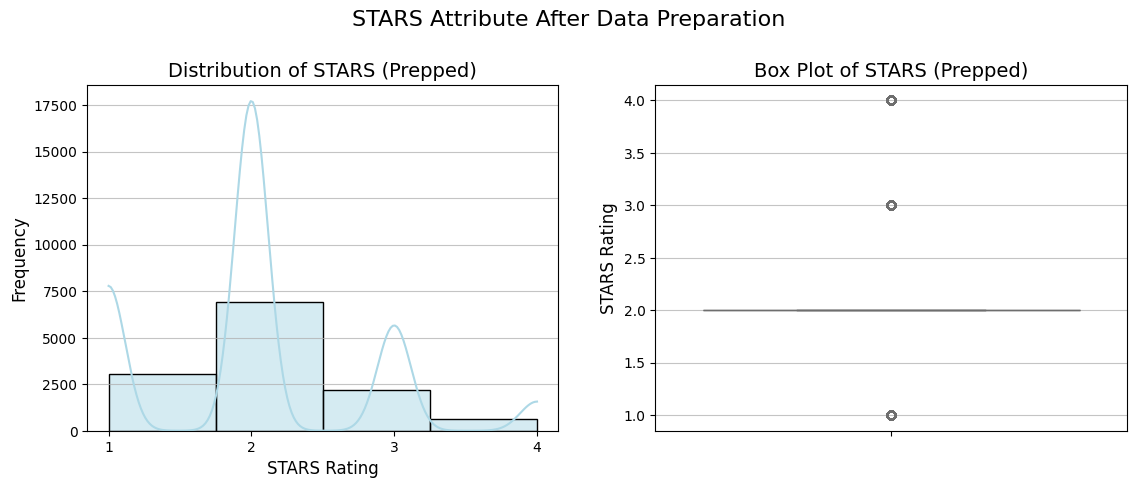

In [103]:
# Plot histogram and boxplot for 'STARS'
print("--- Plot histogram and boxplot for 'STARS' After Imputation and Capping ---\n")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_prepped['STARS'], bins=len(df_prepped['STARS'].unique()), kde=True, color='lightblue')
plt.title('Distribution of STARS (Prepped)', fontsize=14)
plt.xlabel('STARS Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(sorted(df_prepped['STARS'].unique())) # Ensure x-ticks show actual star ratings
plt.grid(axis='y', alpha=0.75)


plt.subplot(1, 2, 2)
sns.boxplot(y=df_prepped['STARS'], color='lightcoral')
plt.title('Box Plot of STARS (Prepped)', fontsize=14)
plt.ylabel('STARS Rating', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout(pad=3.0)
plt.suptitle('STARS Attribute After Data Preparation', y=1.02, fontsize=16)
plt.show()

### 3. Final check

In [104]:
skewed_cols = [
    'Chlorides', 'FreeSulfurDioxide', 'ResidualSugar',
    'Sulphates', 'TotalSulfurDioxide'
]

print("--- Descriptive statistics for transformed columns ---\n")
df_prepped[skewed_cols].describe().T

--- Descriptive statistics for transformed columns ---



,count,mean,std,min,25%,50%,75%,max
Chlorides,12795.0,0.148311,0.200245,0.0,0.046,0.057,0.128,1.351
FreeSulfurDioxide,12795.0,76.293435,92.073935,0.0,30.000,40.000,64.000,623.000
ResidualSugar,12795.0,15.799832,20.805137,0.0,3.900,7.800,14.900,141.150
Sulphates,12795.0,0.768860,0.589470,0.0,0.490,0.540,0.770,4.240
TotalSulfurDioxide,12795.0,188.199961,147.575168,0.0,116.000,142.000,198.000,1057.000


In [105]:
# Re-evaluate skewness
print("--- Skewness values after log1p transformation ---\n")
for col in skewed_cols:
    original_skew = df[col].skew() # Using original df to get original skewness for comparison
    new_skew = df_prepped[col].skew()
    print(f"  {col}: \nOriginal Skew = {original_skew:.3f} ----> Transformed Skew = {new_skew:.3f}\n")

--- Skewness values after log1p transformation ---

  Chlorides: 
Original Skew = 0.030 ----> Transformed Skew = 2.381

  FreeSulfurDioxide: 
Original Skew = 0.006 ----> Transformed Skew = 2.430

  ResidualSugar: 
Original Skew = -0.053 ----> Transformed Skew = 2.361

  Sulphates: 
Original Skew = 0.006 ----> Transformed Skew = 2.247

  TotalSulfurDioxide: 
Original Skew = -0.007 ----> Transformed Skew = 2.108



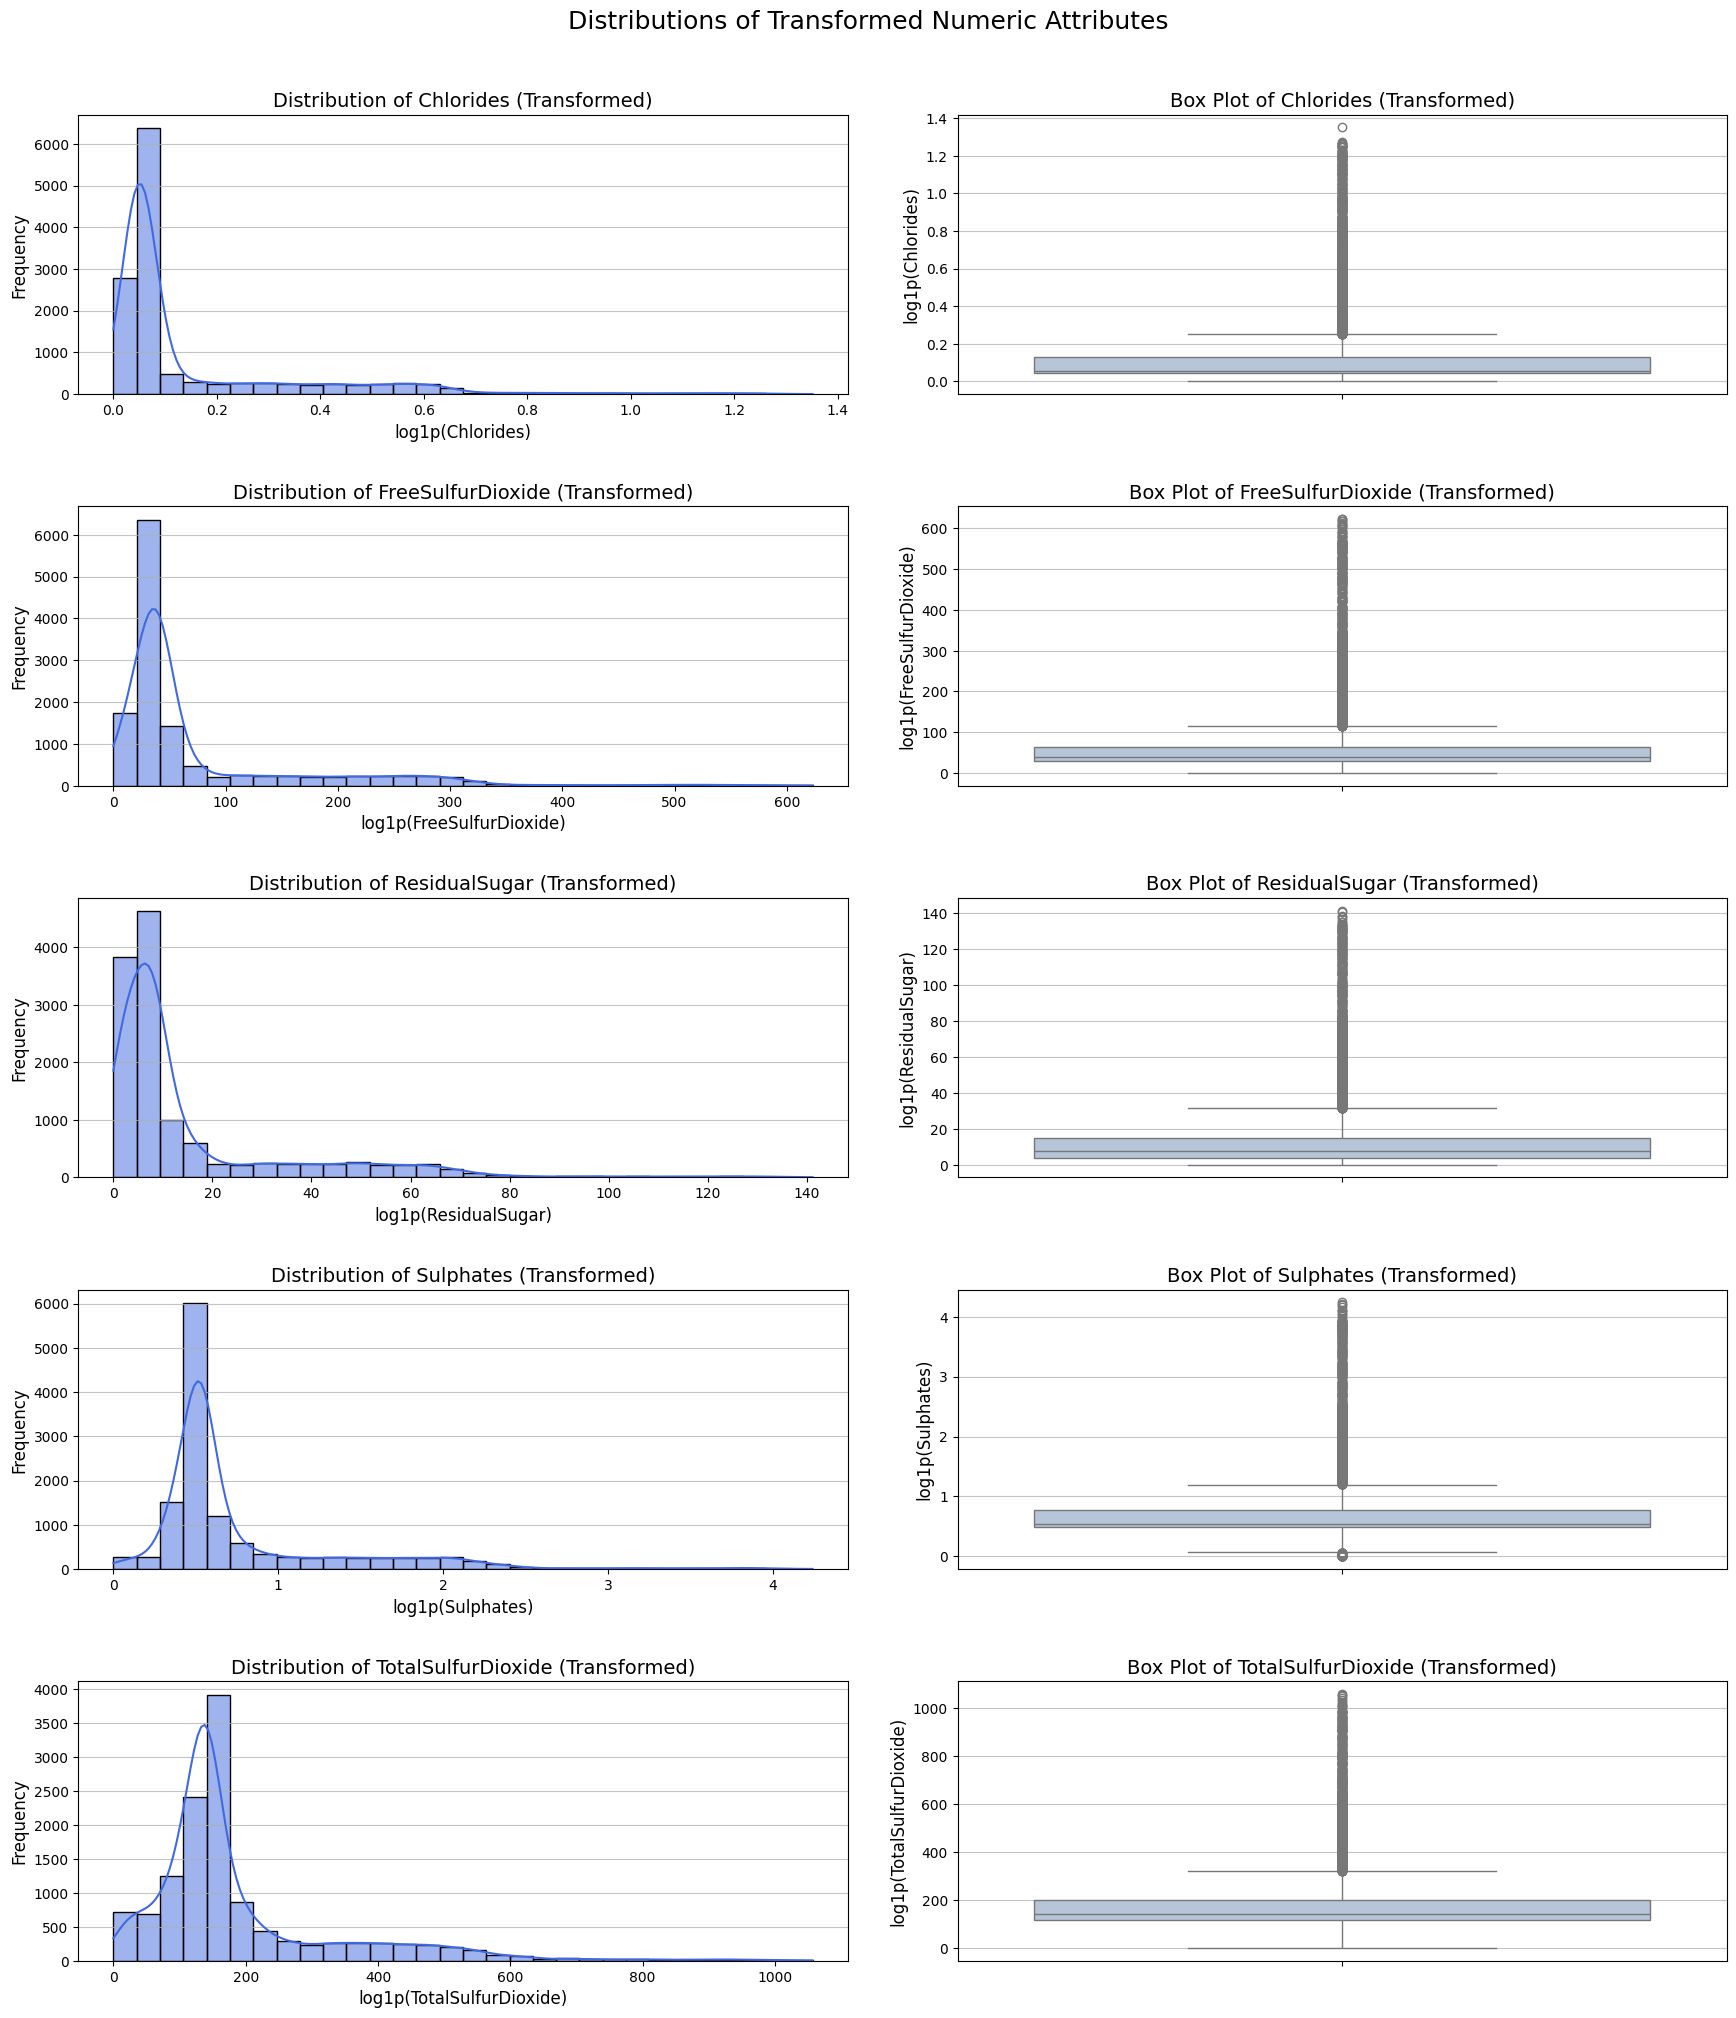



--- Prepped Data Review Complete ---


In [106]:
# Plot histograms and boxplots for the transformed columns
plt.figure(figsize=(18, 4 * len(skewed_cols)))
for i, col in enumerate(skewed_cols):
    # Histogram of transformed data
    plt.subplot(len(skewed_cols), 2, 2*i + 1)
    sns.histplot(df_prepped[col], kde=True, bins=30, color='royalblue')
    plt.title(f'Distribution of {col} (Transformed)', fontsize=14)
    plt.xlabel(f'log1p({col})', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)

    # Box Plot of transformed data
    plt.subplot(len(skewed_cols), 2, 2*i + 2)
    sns.boxplot(y=df_prepped[col], color='lightsteelblue')
    plt.title(f'Box Plot of {col} (Transformed)', fontsize=14)
    plt.ylabel(f'log1p({col})', fontsize=12)
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout(pad=3.0)
plt.suptitle('Distributions of Transformed Numeric Attributes', y=1.02, fontsize=18)
plt.show()

print("\n\n--- Prepped Data Review Complete ---")

## Part 5: Conclusion
**EDA Review**
* Based on this comprehensive EDA, the wine dataset exhibits several issues that need to be addressed prior to applying any machine learning models:
    * Missing Data: Significant missing values, especially in `STARS` and `CitricAcid`, necessitate an imputation strategy. The choice of imputation  depended on the distribution of the data.
    * Outliers: The presence of numerous outliers in several chemical composition variables suggests that these features might benefit from outlier treatment such as capping, transformation or other robust scaling methods to reduce their influence on models.
    * Skewed Distributions: Many numerical attributes were highly skewed. Applying mathematical transformations like logarithm, square root or Box-Cox to these variables helped normalize their distributions, which improved performance.
    * Categorical/Ordinal Variable Integrity: The `STARS` variable needs careful handling, we needed to address its missing values and needed to ensure its integrity as an ordinal feature. If any values outside 1-4 are found, they were corrected or removed.
    * Invalid Values: Any identified negative values in chemical composition attributes or other illogical entries was cleaned, either by correction, imputation, or removal.
* The insights gained from this EDA directly informed the Data Preparation steps, ensuring that the dataset were robust, reliable, and optimized for subsequent machine learning modles.

**Data & Prepped Data Review**
* Missing Values: Successfully Addressed
    * Before Preparation: Our initial EDA revealed significant missing values, if negative values were present we converted to NaN.
    * After Preparation: As confirmed by `df_prepped.isnull().sum()`, there were no longer any missing values in the dataset.
    * All NaN entries were successfully imputed using the median, ensuring a complete dataset for model training.
    * This step eliminated a common source of errors and model instability.
* STARS Attribute: Integrity Restored
    * Before Preparation: The `STARS` column had missing values and could have contained out-of-range values (e.g., 0 or 5).
    * After Preparation: The `STARS` column is now fully populated due to median imputation.
    * A check for out-of-range values confirmed that no values needed capping beyond the imputation of NaNs, indicating that all non-missing `STARS` ratings were already within the valid 1−4 range.
    * The histogram and box plot for `STARS` now show a clean distribution of integer values, with a count matching the total number of observations. This makes STARS a reliable feature for modeling.
* Skewed Chemical Attributes: Distributions Normalized and Outliers Mitigated
    * Before Preparation: Attributes such as `Chlorides`, `FreeSulfurDioxide`, `ResidualSugar`, `Sulphates`, and `TotalSulfurDioxide` exhibited pronounced right-skewness and numerous high-value outliers.
    * This skewed nature can violate assumptions of some machine learning models like linear regression and reduce their predictive power.
    * After Preparation with Logarithmic Transformation np.log1p:
    * The skewness of these variables has been significantly reduced, as evidenced by the "Transformed Skew" values being much closer to zero compared to their "Original Skew."
    * This makes their distributions more symmetrical, resembling a normal distribution.
    * The impact of outliers has been mitigated. The np.log1p transformation compresses the larger values, effectively pulling in the previously distant outliers towards the main body of the data.
    * Improved Model Performance: Normalizing distributions and reducing outlier influence lead to better model performance, faster convergence, and more reliable coefficient.

**Summary of Improvements**
* The data preparation steps have successfully transformed the raw, "messy" wine dataset into a clean, consistent, and more usable format.
* Missing values have been handled, invalid entries corrected, and highly skewed distributions normalized. These improvements are crucial because they:
* Increase Data Reliability: Reduce errors and inconsistencies, making the data more trustworthy.
* Enhance Model Performance: Prepare features in a way that aligns better with the assumptions of various machine learning algorithms, potentially leading to more accurate and robust models.
* Improve Interpretability: Normalized distributions can make it easier to interpret the relationships between features and the target variable.
* The dataset is now in a significantly better state, ready for advanced machine learning modeling.